In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns; sns.set()
matplotlib.rcParams['agg.path.chunksize'] = 10000
import os
from pathlib import Path

In [24]:
p = Path('./production-run-911')
runs= [path for path in p.iterdir() if path.parts[-1].startswith('r')]
participants={}

for run in runs:
    i=run.parts[-1][:5]
    if i in participants:
        participants[i].append(run)
    else:
        participants[i]=[run]

In [25]:
ls=[]
for run in runs:
    i=bin(int(run.parts[-1][1:-4]))
    participant=run.parts[-1][0:5]
    ls.append({'id':participant, 'perspective': int(i[-2:],2), 'speed':int(i[-4:-2],2), 'path': run, 'order': int(i[-6:-4],2)})

#     ls.append({'id': i[]})

# ls.sort()
# for i in ls:
#     print(str(i)[:7], bin(int(i)))

runsDF=pd.DataFrame(ls)
runsDF.sort_values('id', inplace=True)
[l['path'] for l in ls]

[PosixPath('production-run-911/r59938733.csv'),
 PosixPath('production-run-911/r45875171.csv'),
 PosixPath('production-run-911/r18559809.csv'),
 PosixPath('production-run-911/r57560125.csv'),
 PosixPath('production-run-911/r18559821.csv'),
 PosixPath('production-run-911/r63565823.csv'),
 PosixPath('production-run-911/r11135747.csv'),
 PosixPath('production-run-911/r11135745.csv'),
 PosixPath('production-run-911/r63565821.csv'),
 PosixPath('production-run-911/r54067059.csv'),
 PosixPath('production-run-911/r58145139.csv'),
 PosixPath('production-run-911/r63565809.csv'),
 PosixPath('production-run-911/r24834595.csv'),
 PosixPath('production-run-911/r31701395.csv'),
 PosixPath('production-run-911/r18559823.csv'),
 PosixPath('production-run-911/r57560127.csv'),
 PosixPath('production-run-911/r59938735.csv'),
 PosixPath('production-run-911/r59938721.csv'),
 PosixPath('production-run-911/r53483377.csv'),
 PosixPath('production-run-911/r53483389.csv'),
 PosixPath('production-run-911/r53428687

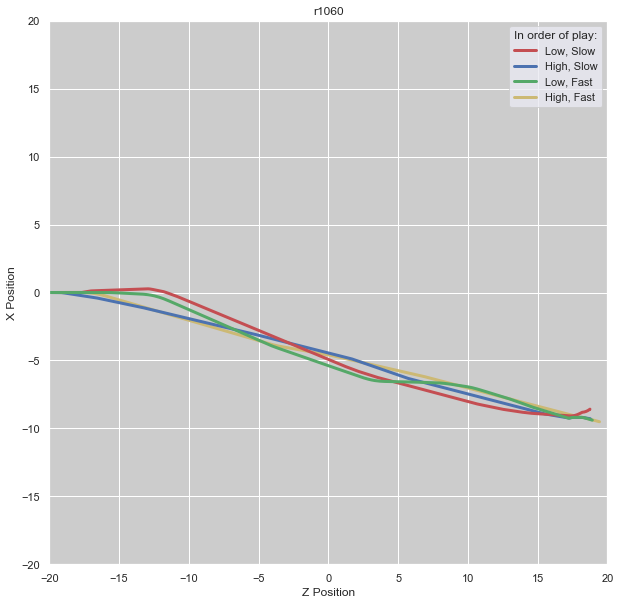

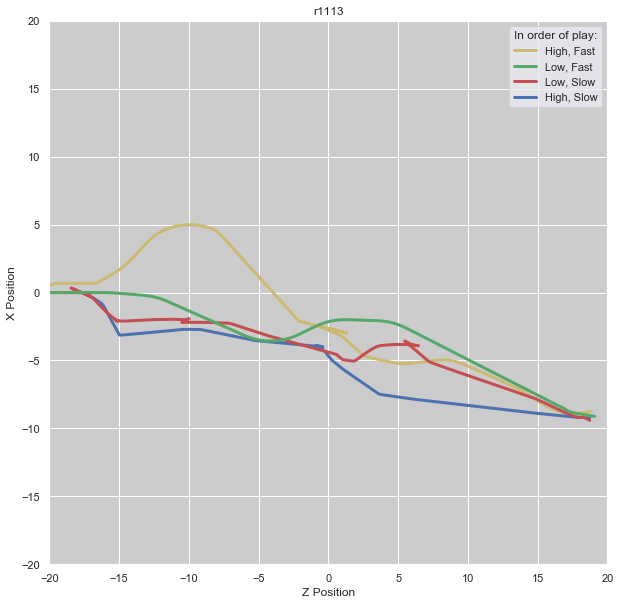

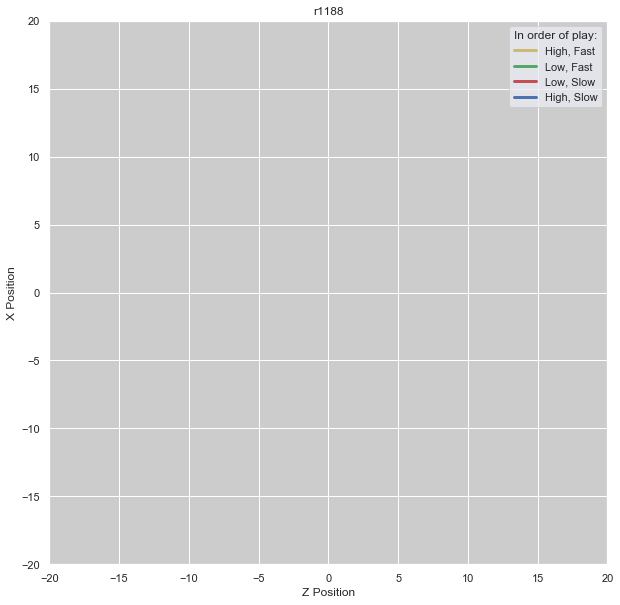

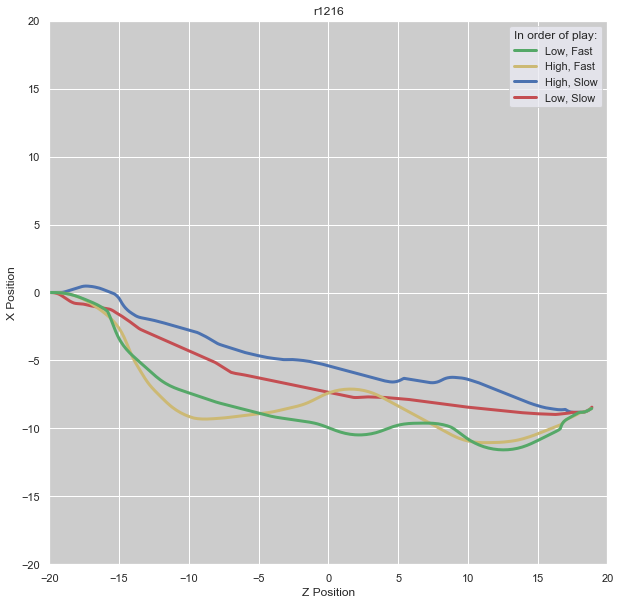

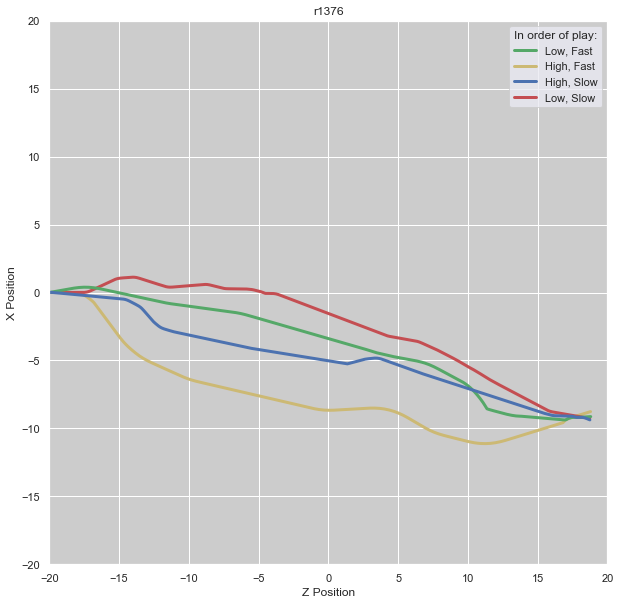

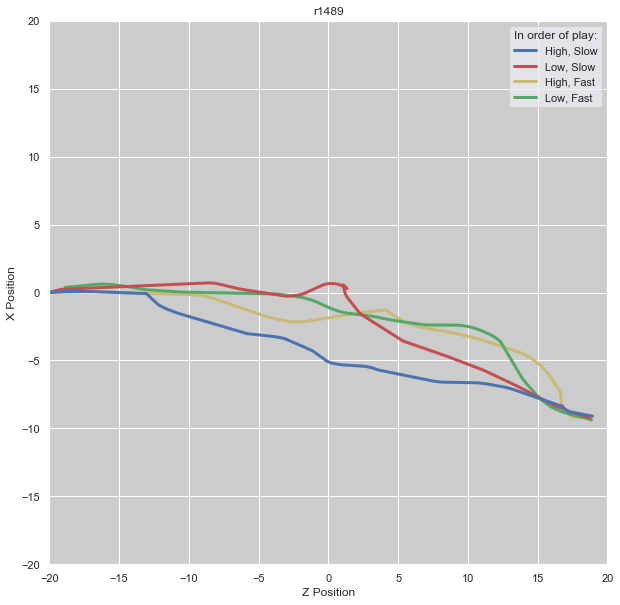

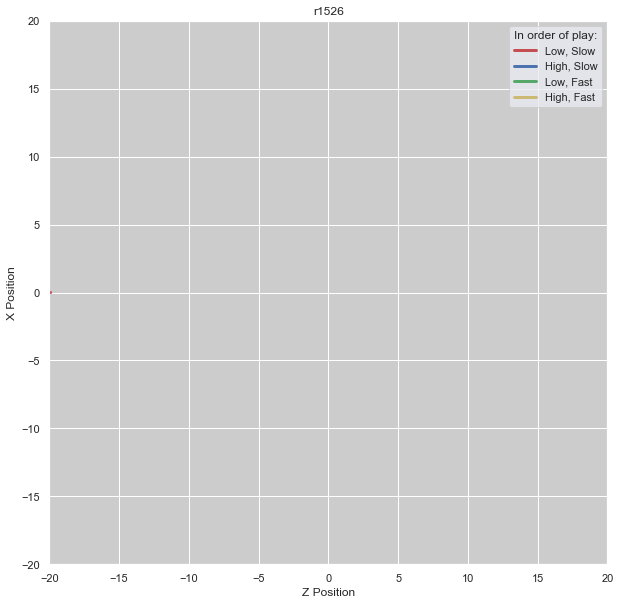

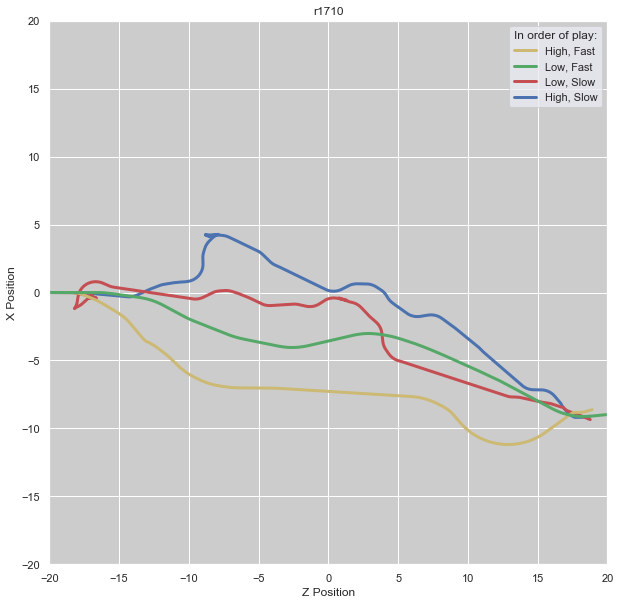

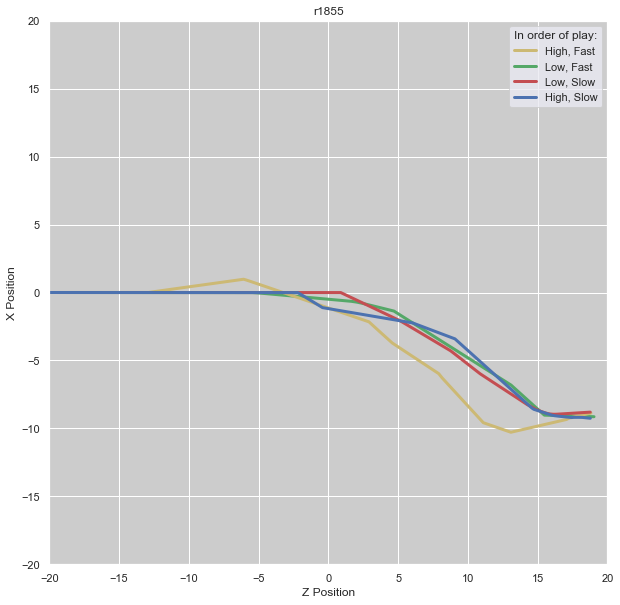

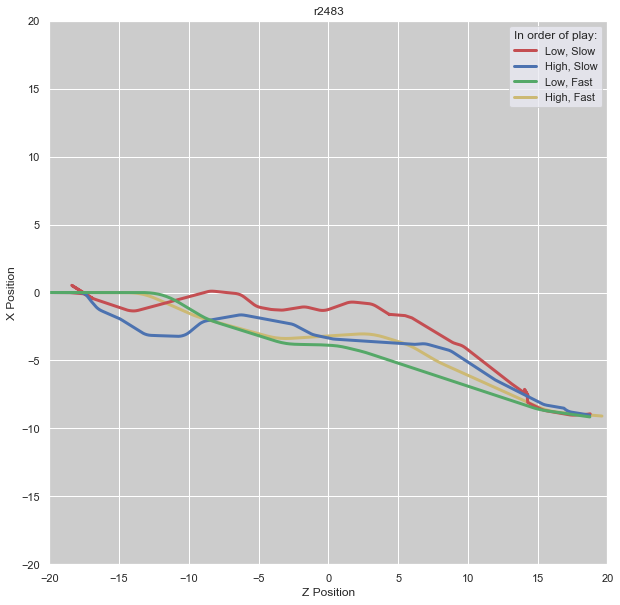

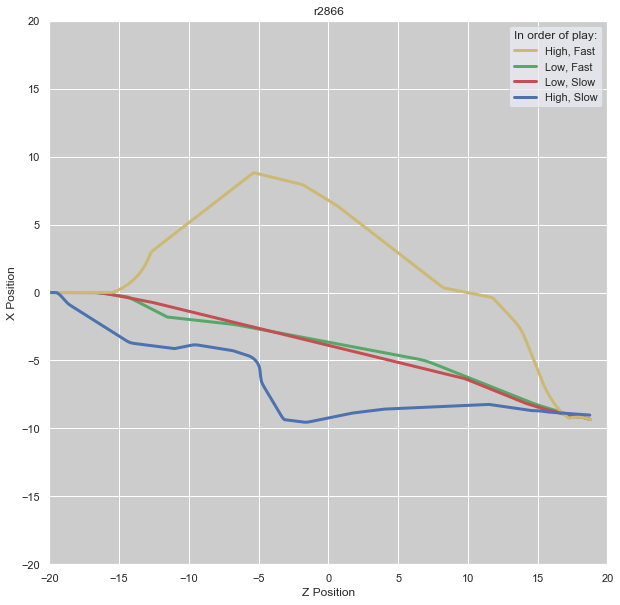

EmptyDataError: No columns to parse from file

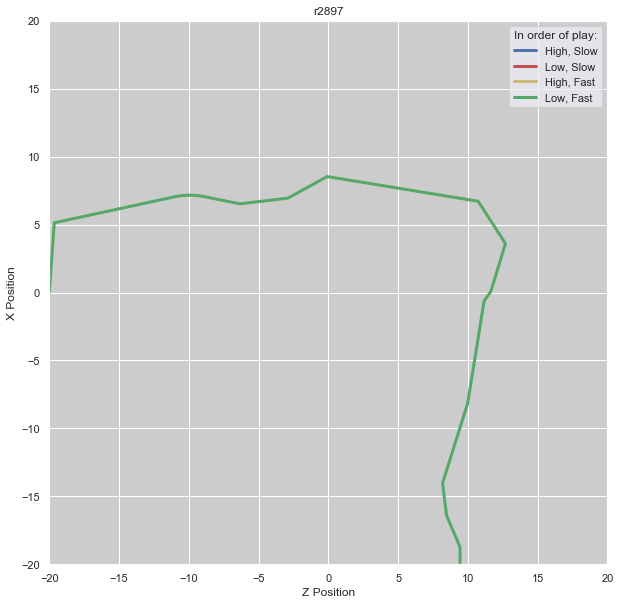

In [22]:
colors={(1,0) :'r-', (1,3) : 'g-', (3,0) : 'b-', (3,3) : 'y-'}
orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]
legend_elements = np.array([Line2D([0], [0], color='r', lw=3, label='Low, Slow'),\
                       Line2D([0], [0], color='g', lw=3, label='Low, Fast'),\
                       Line2D([0], [0], color='b', lw=3, label='High, Slow'),\
                       Line2D([0], [0], color='y', lw=3, label='High, Fast')])
for part in runsDF.id.unique():
    paths=runsDF[runsDF['id']==part]
    title=part
    order= runsDF[runsDF['id']==part]['order'].iloc[0]
    fig, ax = plt.subplots()
    ax.set_facecolor("#CCCCCC")
    ax.set_title(title)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax.set_xlabel("Z Position")
    ax.set_ylabel("X Position")
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])
    legend = list(legend_elements[orders[order]])
    ax.legend(handles=legend, loc='upper right', title='In order of play:')
    for path in paths.iterrows():
#         print("reading from", path[1]['path'])
        condition=(path[1]['perspective'],path[1]['speed'])
        data=pd.read_csv(path[1]['path'])
        data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
        i=0
        ax.plot(data[data['i']==i]['pz'], data[data['i']==i]['px'], colors[condition], lw=3)
    plt.savefig('./player_figs/'+str(title)+'.png')
    plt.show()

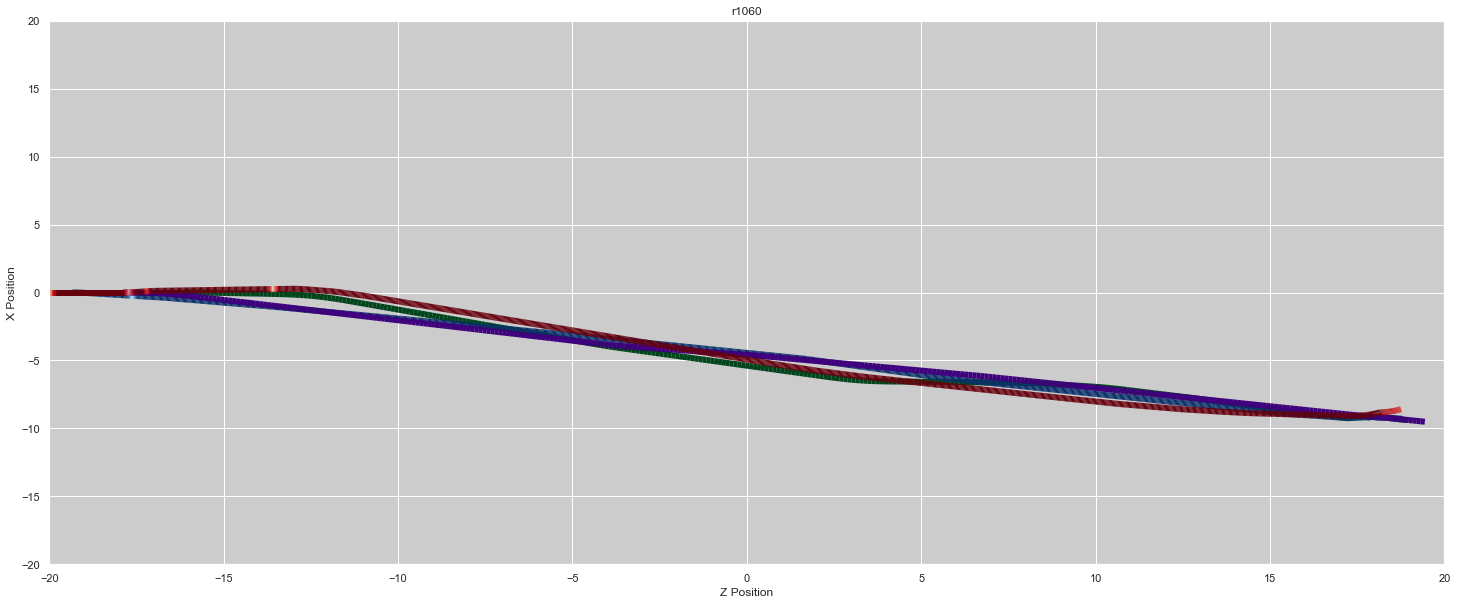

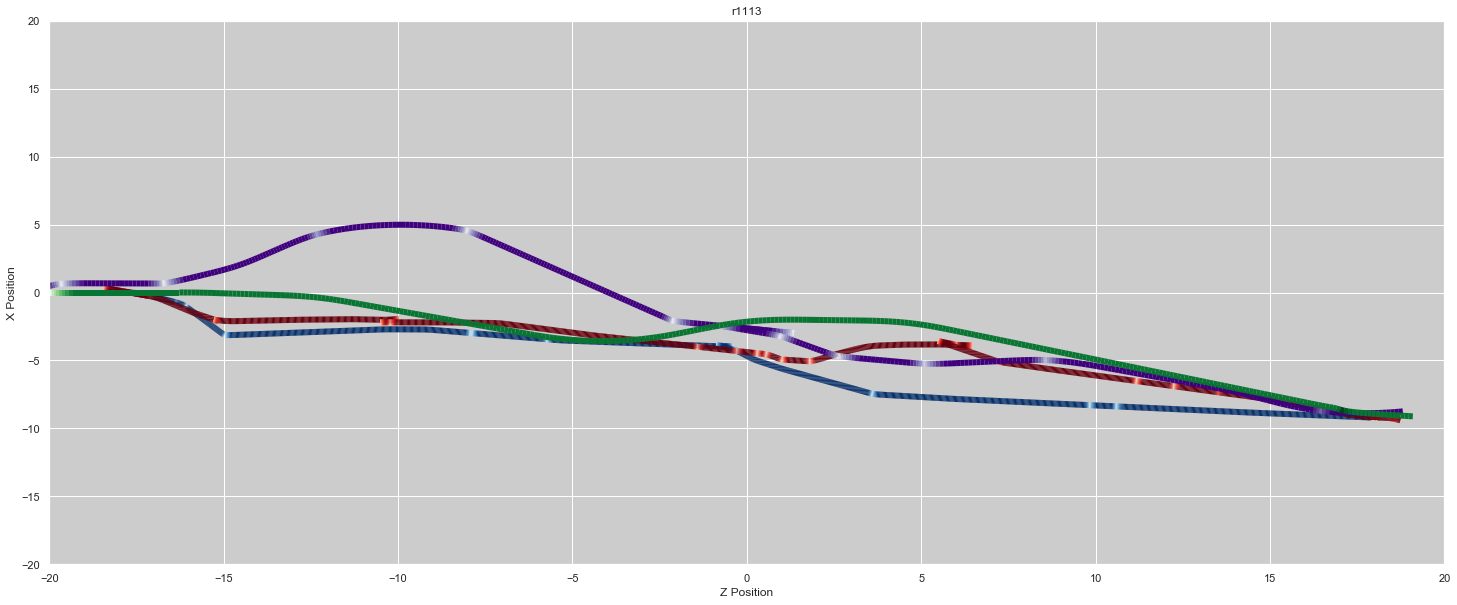

KeyboardInterrupt: 

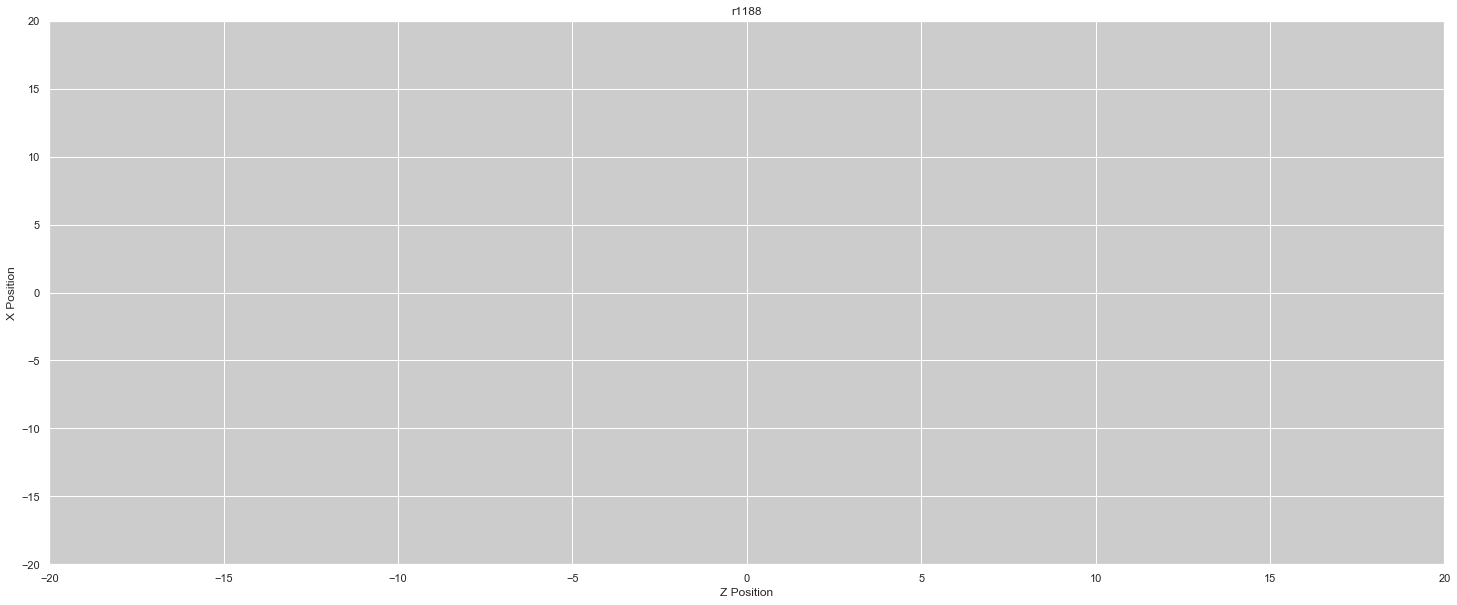

In [28]:
colors={(1,0) :'Reds', (1,3) : 'Greens', (3,0) : 'Blues', (3,3) : 'Purples'}
labels={(1,0) :'Low, Slow', (1,3) : 'Low, Fast', (3,0) : 'High, Slow', (3,3) : 'High, Fast'}
orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]

# paths=runsDF[runsDF['id']=='r5814']
for part in runsDF.id.unique():
# title='r1489'
    paths=runsDF[runsDF['id']==part]
    title=part
    order= runsDF[runsDF['id']==part]['order'].iloc[0]
    fig, ax = plt.subplots()
    ax.set_facecolor("#CCCCCC")
    ax.set_title(title)
    fig.set_figheight(10)
    fig.set_figwidth(25)
    ax.set_xlabel("Z Position")
    ax.set_ylabel("X Position")
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])
# legend = list(legend_elements[orders[order]])
# ax.legend(handles=legend, loc='upper right', title='In order of play:')
    for path in paths.iterrows():
        condition=(path[1]['perspective'],path[1]['speed'])
        data=pd.read_csv(path[1]['path'])
        data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
        participant=data[data['i']==0]

        #color gradients
        points = np.array([participant['pz'], participant['px']]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        norm = plt.Normalize(participant['speed'].min(), participant['speed'].max())
        lc = LineCollection(segments, cmap=colors[condition], norm=norm)

        lc.set_array(participant['speed'])
        lc.set_linewidth(6)
        line = ax.add_collection(lc)
#         fig.colorbar(line, label=labels[condition], aspect=40)

    #     ax.plot(participant['pz'], participant['px'], colors[condition], lw=3)
    plt.savefig('player_figs/'+str(title)+'_gradient.png')
    plt.show()



/Users/jd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


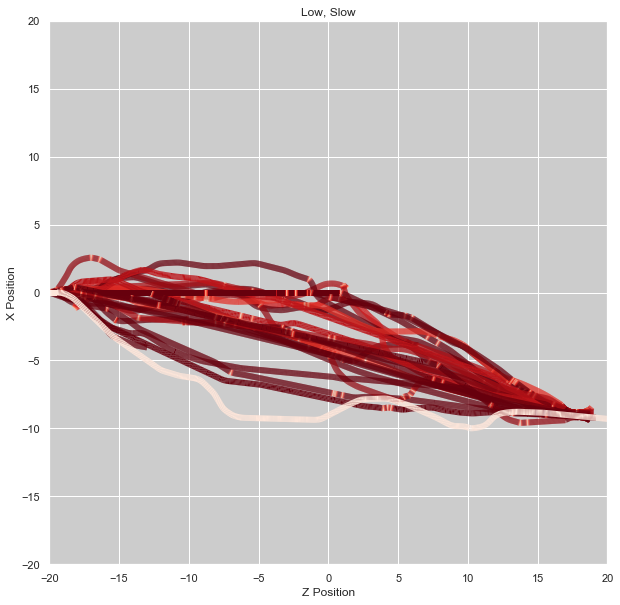

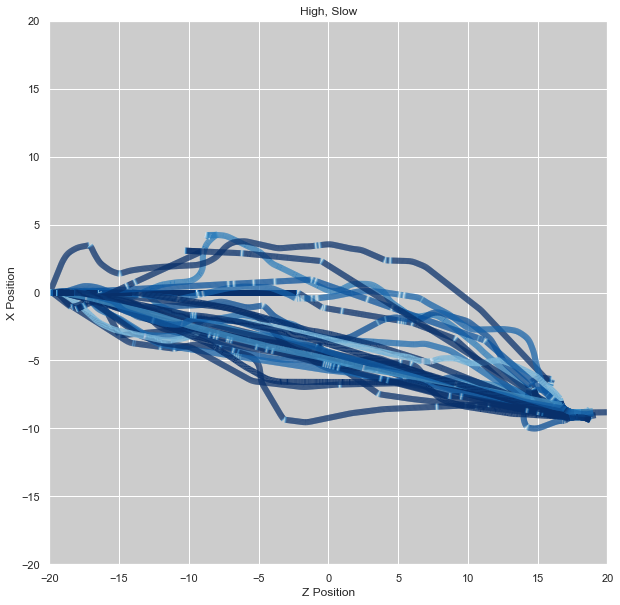

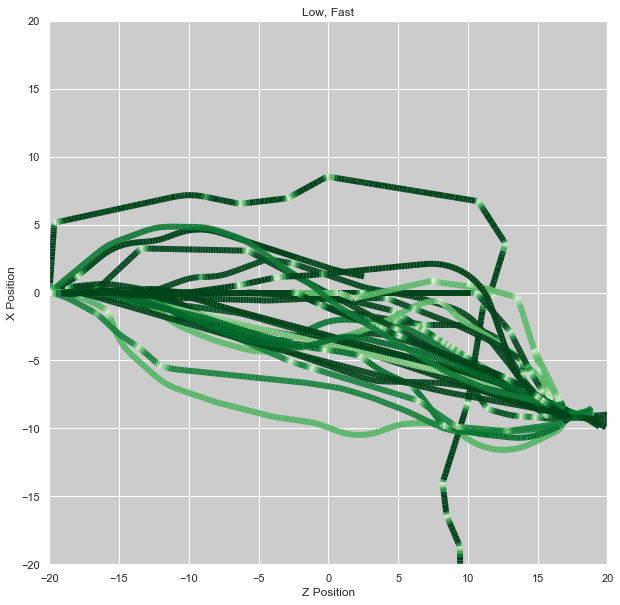

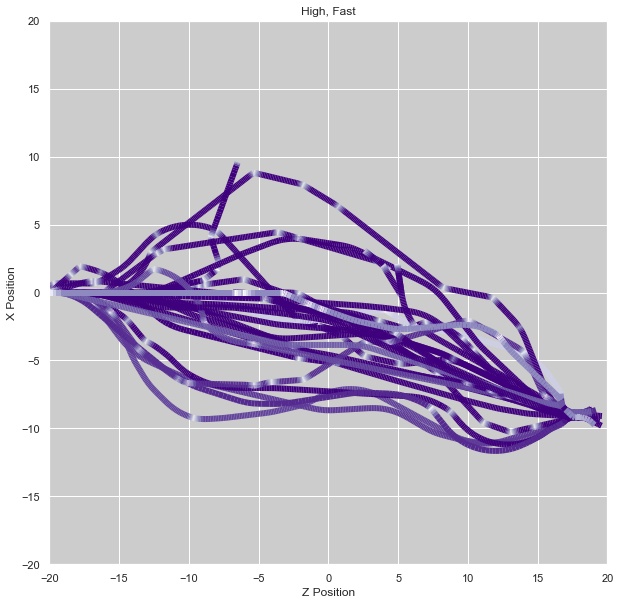

In [30]:
colors={(1,0) :'Reds', (1,3) : 'Greens', (3,0) : 'Blues', (3,3) : 'Purples'}
labels={(1,0) :'Low, Slow', (1,3) : 'Low, Fast', (3,0) : 'High, Slow', (3,3) : 'High, Fast'}
orders= [[3,1,0,2],[2,0,3,1],[0,2,1,3],[1,3,2,0]]

for speed_i in (0, 3):
    for persp_i in (1, 3):        
        paths=runsDF[runsDF['perspective']==persp_i][runsDF['speed']==speed_i]
        title=labels[(persp_i, speed_i)]
        fig, ax = plt.subplots()
        ax.set_facecolor("#CCCCCC")
        ax.set_title(title)
        fig.set_figheight(10)
        fig.set_figwidth(10)
        ax.set_xlabel("Z Position")
        ax.set_ylabel("X Position")
        ax.set_xlim([-20,20])
        ax.set_ylim([-20,20])
#         legend_elements = [Line2D([0], [0], color='r', lw=3, label='Low, Slow'),\
#                            Line2D([0], [0], color='g', lw=3, label='Low, Fast'),\
#                            Line2D([0], [0], color='b', lw=3, label='High, Slow'),\
#                            Line2D([0], [0], color='y', lw=3, label='High, Fast')]
#         ax.legend(handles=legend_elements, loc='upper right')
        for path in paths.iterrows():
            condition=(path[1]['perspective'],path[1]['speed'])
            data=pd.read_csv(path[1]['path'])
            data['speed']=(data['vx']**2 + data['vz']**2)**(1/2)
            participant=data[data['i']==0]

            points = np.array([participant['pz'], participant['px']]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            norm = plt.Normalize(participant['speed'].min(), participant['speed'].max())
            lc = LineCollection(segments, cmap=colors[condition], norm=norm)

            lc.set_array(participant['speed'])
            lc.set_linewidth(6)
            line = ax.add_collection(lc)
        #     fig.colorbar(line, label=labels[condition], aspect=40)

        # plt.savefig('/Users/im/Documents/player_figs/'+str(title)+'.png')
        plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


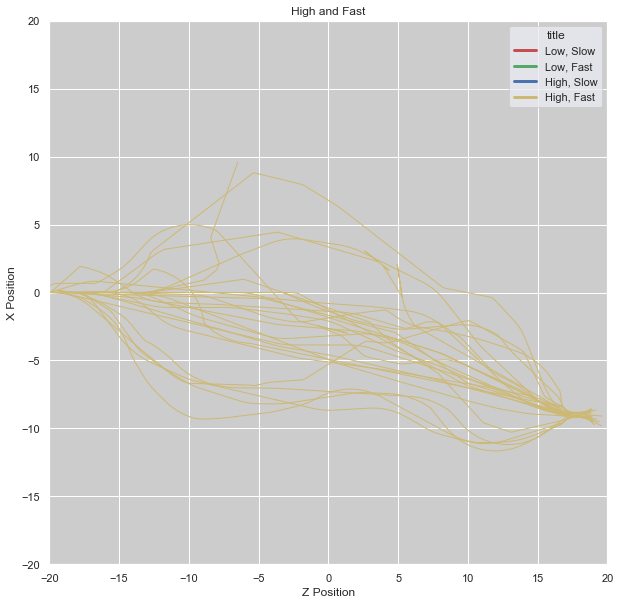

In [144]:
# original

paths=runsDF[runsDF['perspective']==3][runsDF['speed']==3]
title="High and Fast"
fig, ax = plt.subplots()
ax.set_facecolor("#CCCCCC")
ax.set_title(title)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_xlabel("Z Position")
ax.set_ylabel("X Position")
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
legend_elements = [Line2D([0], [0], color='r', lw=3, label='Low, Slow'),\
                   Line2D([0], [0], color='g', lw=3, label='Low, Fast'),\
                   Line2D([0], [0], color='b', lw=3, label='High, Slow'),\
                   Line2D([0], [0], color='y', lw=3, label='High, Fast')]
ax.legend(handles=legend_elements, loc='upper right')
for path in paths.iterrows():
    condition=(path[1]['perspective'],path[1]['speed'])
    data=pd.read_csv(path[1]['path'])
    i=0
    ax.plot(data[data['i']==i]['pz'], data[data['i']==i]['px'], colors[condition], lw=1)
# plt.savefig('/Users/im/Documents/player_figs/'+str(title)+'.png')
plt.show()

In [280]:
test=runsDF[runsDF['id']=='r1710'].iloc[0]['path']
td=pd.read_csv(test)
td['speed']=(td['vx']**2 + td['vz']**2)**(1/2)
td.head()

,i,t,px,py,pz,rx,ry,rz,vx,vy,vz,speed
0,0,0.0,0.000000,0.318542,-20.000000,0,0.000000,0,0.000000,0,0.000000,0.000000
1,1,0.0,6.998440,-0.031458,-6.227942,0,1.261245,0,14.874339,0,3.941917,15.387809
2,2,0.0,19.645679,-0.031458,-2.000000,0,357.929993,0,0.000000,0,0.000000,0.000000
3,3,0.0,20.166668,-0.031458,1.666667,0,358.964996,0,0.000000,0,0.000000,0.000000
4,4,0.0,6.059704,-0.031458,-6.436530,0,358.827240,0,-5.831456,0,0.836229,5.891109
